In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

In [ ]:
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])

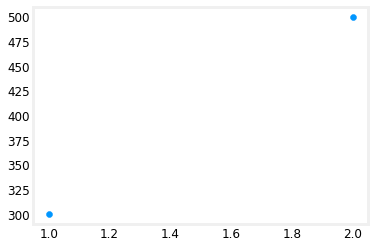

In [ ]:
plt.scatter(x_train, y_train)

In [ ]:
(297**2 + 496**2)/4

83556.25

In [ ]:
def compute_cost(x, y, theta1, theta0):
  n = x.shape[0]
  cost = 0
  for i in range(n):
    h = theta0 + theta1 * x[i]
    cost = cost + (h - y[i])**2
  total_cost = 1/(2*n)*cost
  return total_cost

In [ ]:
t = compute_cost(x_train, y_train, 1, 2)
print(t)

83556.25


In [ ]:
def compute_gradient(x, y, theta1, theta0):
  n = x.shape[0]
  dj_dtheta0 = 0
  dj_dtheta1 = 0

  for i in range(n):
    h = theta0 + theta1*x[i]
    dj_dtheta0_i = h - y[i]
    dj_dtheta1_i = (h - y[i]) * x[i]
    dj_dtheta0 += dj_dtheta0_i
    dj_dtheta1 += dj_dtheta1_i
  dj_dtheta0 = dj_dtheta0 / n
  dj_dtheta1 = dj_dtheta1 / n 

  return dj_dtheta1, dj_dtheta0


In [ ]:
e = compute_gradient(x_train, y_train, 2, 1)
print(e)

(-643.5, -396.0)


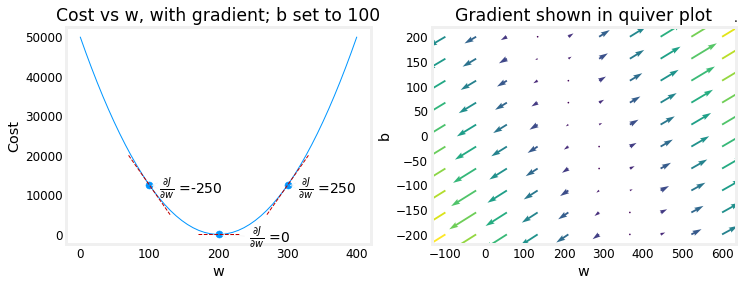

In [ ]:
plt_gradients(x_train,y_train, compute_cost, compute_gradient)
plt.show()

In [ ]:
def gradient_descent(theta0, theta1, x, y, epoch, alpha):
  J_history = []
  theta_history = []
  for i in range(epoch):
    dj_dtheta1, dj_dtheta0 = compute_gradient(x, y, theta1, theta0)
    theta0 = theta0 - alpha * dj_dtheta0
    theta1 = theta1 - alpha * dj_dtheta1

    theta_history.append([theta1, theta0])
    J_history.append(compute_cost(x, y, theta1, theta0))

         
    if i% math.ceil(epoch/10) == 0:
        print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
              f"dj_dw: {dj_dtheta1: 0.3e}, dj_db: {dj_dtheta0: 0.3e}  ",
              f"w: {theta1: 0.3e}, b:{theta0: 0.5e}")
        
  return theta0, theta1, theta_history, J_history


In [ ]:
theta0 = 0
theta1 = 0
epoch = 10000
alpha = 1.0e-2
theta0_final, theta1_final, theta_history_final, J_history_final =  gradient_descent(theta0, theta1, x_train, y_train, epoch, alpha)

Iteration    0: Cost 7.93e+04  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  6.500e+00, b: 4.00000e+00
Iteration 1000: Cost 3.41e+00  dj_dw: -3.712e-01, dj_db:  6.007e-01   w:  1.949e+02, b: 1.08228e+02
Iteration 2000: Cost 7.93e-01  dj_dw: -1.789e-01, dj_db:  2.895e-01   w:  1.975e+02, b: 1.03966e+02
Iteration 3000: Cost 1.84e-01  dj_dw: -8.625e-02, dj_db:  1.396e-01   w:  1.988e+02, b: 1.01912e+02
Iteration 4000: Cost 4.28e-02  dj_dw: -4.158e-02, dj_db:  6.727e-02   w:  1.994e+02, b: 1.00922e+02
Iteration 5000: Cost 9.95e-03  dj_dw: -2.004e-02, dj_db:  3.243e-02   w:  1.997e+02, b: 1.00444e+02
Iteration 6000: Cost 2.31e-03  dj_dw: -9.660e-03, dj_db:  1.563e-02   w:  1.999e+02, b: 1.00214e+02
Iteration 7000: Cost 5.37e-04  dj_dw: -4.657e-03, dj_db:  7.535e-03   w:  1.999e+02, b: 1.00103e+02
Iteration 8000: Cost 1.25e-04  dj_dw: -2.245e-03, dj_db:  3.632e-03   w:  2.000e+02, b: 1.00050e+02
Iteration 9000: Cost 2.90e-05  dj_dw: -1.082e-03, dj_db:  1.751e-03   w:  2.000e+02, b: 1.00024e+02


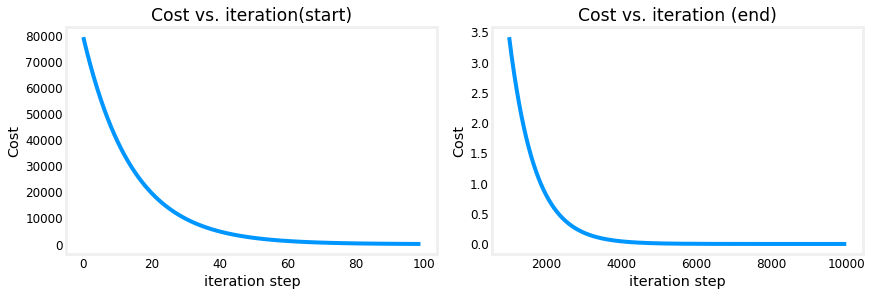

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_history_final[:100])
ax2.plot(1000 + np.arange(len(J_history_final[1000:])), J_history_final[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

In [ ]:
print(f"1000 sqft house prediction {theta1_final*1.0 + theta0_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {theta1_final*1.2 + theta0_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {theta1_final*2.0 + theta0_final:0.1f} Thousand dollars")

1000 sqft house prediction 300.0 Thousand dollars
1200 sqft house prediction 340.0 Thousand dollars
2000 sqft house prediction 500.0 Thousand dollars


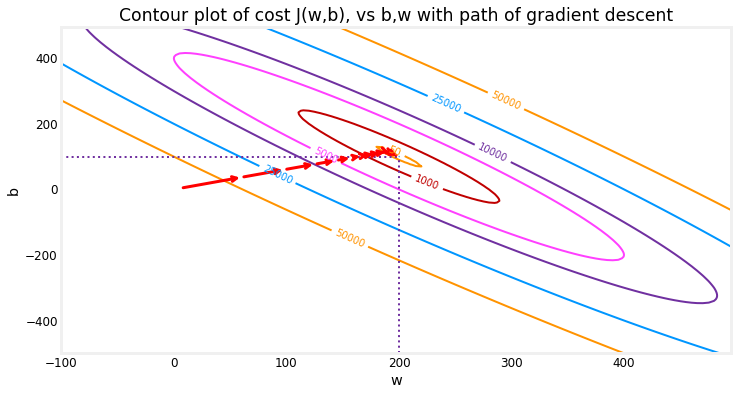

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))
plt_contour_wgrad(x_train, y_train, theta_history_final, ax)

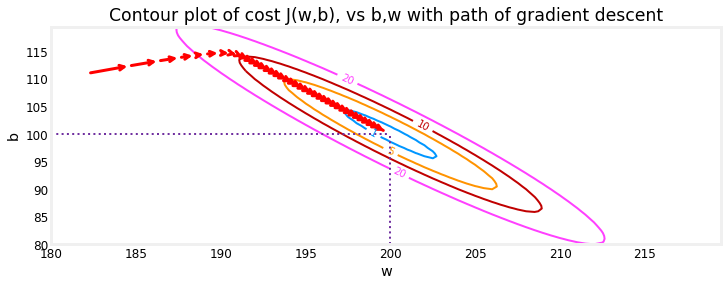

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12, 4))
plt_contour_wgrad(x_train, y_train, theta_history_final, ax, w_range=[180, 220, 0.5], b_range=[80, 120, 0.5],
            contours=[1,5,10,20],resolution=0.5)

In [ ]:
theta0 = 0
theta1 = 0
epoch = 10
alpha = 8.0e-1
theta0_final, theta1_final, theta_history_final, J_history_final =  gradient_descent(theta0, theta1, x_train, y_train, epoch, alpha)

Iteration    0: Cost 2.58e+05  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  5.200e+02, b: 3.20000e+02
Iteration    1: Cost 7.82e+05  dj_dw:  1.130e+03, dj_db:  7.000e+02   w: -3.840e+02, b:-2.40000e+02
Iteration    2: Cost 2.37e+06  dj_dw: -1.970e+03, dj_db: -1.216e+03   w:  1.192e+03, b: 7.32800e+02
Iteration    3: Cost 7.19e+06  dj_dw:  3.429e+03, dj_db:  2.121e+03   w: -1.551e+03, b:-9.63840e+02
Iteration    4: Cost 2.18e+07  dj_dw: -5.974e+03, dj_db: -3.691e+03   w:  3.228e+03, b: 1.98886e+03
Iteration    5: Cost 6.62e+07  dj_dw:  1.040e+04, dj_db:  6.431e+03   w: -5.095e+03, b:-3.15579e+03
Iteration    6: Cost 2.01e+08  dj_dw: -1.812e+04, dj_db: -1.120e+04   w:  9.402e+03, b: 5.80237e+03
Iteration    7: Cost 6.09e+08  dj_dw:  3.156e+04, dj_db:  1.950e+04   w: -1.584e+04, b:-9.80139e+03
Iteration    8: Cost 1.85e+09  dj_dw: -5.496e+04, dj_db: -3.397e+04   w:  2.813e+04, b: 1.73730e+04
Iteration    9: Cost 5.60e+09  dj_dw:  9.572e+04, dj_db:  5.916e+04   w: -4.845e+04, b:-2.99567e+04


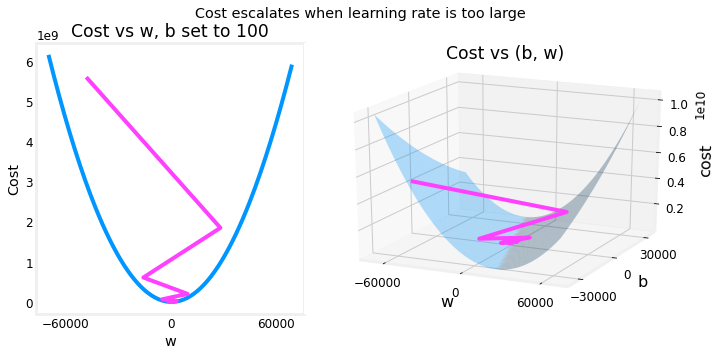

In [ ]:
plt_divergence(theta_history_final, J_history_final,x_train, y_train)
plt.show()